Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
# Making image path

import os
import pandas as pd
path = "C:/Users/Ibtesam/Desktop/flowers"
lists = os.listdir(path) # daisy, dandelion, rose, sunflower, tulip (folders)
labels = []
file_lists = []

for folder in lists:
    files = os.listdir(os.path.join(path, folder)) # C:/Users/Ibtesam/Desktop/flowers/daisy
    for file in files:
        file_list = path + "/" + folder + "/" + file # C:/Users/Ibtesam/Desktop/flowers/daisy/1.jpg
        file_lists.append(file_list)
        labels.append(folder)
        
file_dict = {"path": file_lists,
             "labels": labels}

data = pd.DataFrame(file_dict, index= None)
data = data.sample(frac = 1, random_state = 2)
data.labels = data.labels.replace({"daisy": 0, "dandelion": 1,  "rose": 2, "sunflower": 3, "tulip": 4})

In [2]:
data

,path,labels
2307,C:/Users/Ibtesam/Desktop/flowers/rose/50024603...,2
1866,C:/Users/Ibtesam/Desktop/flowers/rose/14166797...,2
538,C:/Users/Ibtesam/Desktop/flowers/daisy/4865691...,0
2663,C:/Users/Ibtesam/Desktop/flowers/sunflower/146...,3
95,C:/Users/Ibtesam/Desktop/flowers/daisy/1450781...,0
...,...,...
3335,C:/Users/Ibtesam/Desktop/flowers/sunflower/973...,3
1099,C:/Users/Ibtesam/Desktop/flowers/dandelion/236...,1
2514,C:/Users/Ibtesam/Desktop/flowers/rose/74811174...,2
3606,C:/Users/Ibtesam/Desktop/flowers/tulip/1527547...,4


In [3]:
data.reset_index(drop = True, inplace = True)

In [4]:
data

,path,labels
0,C:/Users/Ibtesam/Desktop/flowers/rose/50024603...,2
1,C:/Users/Ibtesam/Desktop/flowers/rose/14166797...,2
2,C:/Users/Ibtesam/Desktop/flowers/daisy/4865691...,0
3,C:/Users/Ibtesam/Desktop/flowers/sunflower/146...,3
4,C:/Users/Ibtesam/Desktop/flowers/daisy/1450781...,0
...,...,...
4318,C:/Users/Ibtesam/Desktop/flowers/sunflower/973...,3
4319,C:/Users/Ibtesam/Desktop/flowers/dandelion/236...,1
4320,C:/Users/Ibtesam/Desktop/flowers/rose/74811174...,2
4321,C:/Users/Ibtesam/Desktop/flowers/tulip/1527547...,4


In [5]:
# Converting data into numpy array
import matplotlib.image as img
import numpy as np
import pandas as pd
import cv2

data_list = list()
for i in data.path:
    image = img.imread(i) # reads image in RGB
#     if (image.shape[2] == 3):
    image_resized = cv2.resize(image, (75,75)) # convert image in integer
    data_list.append(image_resized)

In [6]:
# data_list[0]
data_list[0].min()

0

In [7]:
data_list[0].max()

255

In [8]:
# Converting list to array
data_array = np.array(data_list)
data_array.shape

(4323, 75, 75, 3)

In [9]:
len(data_array)

4323

In [10]:
labels = np.array(data.labels)

In [11]:
labels.shape

(4323,)

In [12]:
# Visualizing our data
import matplotlib.pyplot as plt

def visualize(data, labels):
    
    class_name = ["daisy","dandelion","rose","sunflower","tulip"]

    import random
    plt.figure(figsize = (9,9))
    for i in range(9):
        plt.subplot(3,3,i+1)
        random_index = random.choice(range(len(data)))
        plt.imshow(data[random_index])
        plt.title(class_name[labels[random_index]])
        plt.axis(False)

In [14]:
# Splitting data in 60 and 40 ratio
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data_array, labels, test_size = 0.4, random_state = 42)
len(train_data), len(test_data), len(train_labels), len(test_labels)

(2593, 1730, 2593, 1730)

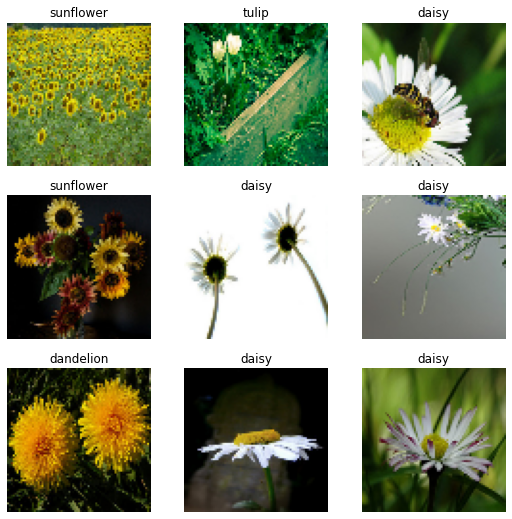

In [16]:
visualize(test_data, test_labels)

In [17]:
train_data.shape, test_data.shape

((2593, 75, 75, 3), (1730, 75, 75, 3))

In [18]:
train_data

array([[[[228, 201,   1],
         [228, 203,   0],
         [231, 206,   0],
         ...,
         [231, 204,   0],
         [232, 207,   1],
         [229, 211,   0]],

        [[225, 197,   0],
         [227, 198,   1],
         [229, 203,   0],
         ...,
         [229, 207,   0],
         [233, 210,   0],
         [230, 210,   0]],

        [[221, 191,   1],
         [222, 192,   0],
         [225, 195,   0],
         ...,
         [232, 211,   1],
         [231, 212,   0],
         [229, 212,   0]],

        ...,

        [[181, 132,   2],
         [180, 122,   0],
         [179, 119,   1],
         ...,
         [214, 184,   1],
         [209, 179,   0],
         [207, 174,   1]],

        [[174, 115,   0],
         [168, 114,   1],
         [157, 110,   0],
         ...,
         [216, 188,   1],
         [213, 185,   1],
         [209, 178,   0]],

        [[159, 109,   1],
         [150, 111,   0],
         [140, 109,   1],
         ...,
         [215, 190,   1],
        

In [19]:
train_labels

array([1, 4, 2, ..., 2, 2, 2], dtype=int64)

In [20]:
# Normalizing the data
train_data = train_data.reshape((2593, -1))
train_data = train_data/255
test_data = test_data.reshape((1730, -1))
test_data = test_data/255

In [21]:
train_data.shape, test_data.shape

((2593, 16875), (1730, 16875))

In [26]:
import tensorflow as tf

# Setting random seed
tf.random.set_seed(42)

# Setting Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 5)

# 1. Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (train_data.shape[1],)),
    tf.keras.layers.Dense(1000, activation = "relu"), # , kernel_regularizer = tf.keras.regularizers.l2(0.01)
    tf.keras.layers.Dense(5, activation = "softmax")
])

# 2. Compiling the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(0.0001),
              metrics = ["accuracy"])

# 3. Fitting the model
model.fit(train_data, train_labels, epochs = 50, batch_size = 64)

Epoch 1/50
41/41 [==============================] - 4s 80ms/step - loss: 2.6432 - accuracy: 0.2869
Epoch 2/50
41/41 [==============================] - 3s 77ms/step - loss: 1.2793 - accuracy: 0.4494
Epoch 3/50
41/41 [==============================] - 3s 78ms/step - loss: 1.2017 - accuracy: 0.4812
Epoch 4/50
41/41 [==============================] - 3s 77ms/step - loss: 1.1597 - accuracy: 0.5153
Epoch 5/50
41/41 [==============================] - 3s 77ms/step - loss: 1.1277 - accuracy: 0.5415
Epoch 6/50
41/41 [==============================] - 3s 78ms/step - loss: 1.1158 - accuracy: 0.5550
Epoch 7/50
41/41 [==============================] - 3s 79ms/step - loss: 1.0240 - accuracy: 0.5976
Epoch 8/50
41/41 [==============================] - 3s 78ms/step - loss: 1.0314 - accuracy: 0.6053
Epoch 9/50
41/41 [==============================] - 3s 78ms/step - loss: 0.9778 - accuracy: 0.6265
Epoch 10/50
41/41 [==============================] - 3s 78ms/step - loss: 0.9296 - accuracy: 0.6363
Epoch 11/

In [28]:
# 4. Evaluating the model
model.evaluate(test_data, test_labels)

55/55 [==============================] - 1s 11ms/step - loss: 1.5471 - accuracy: 0.4688


[1.5470725297927856, 0.4687861204147339]

In [64]:
pred_labels = model.predict(test_data)
pred_labels

array([[4.04672205e-01, 1.90238915e-02, 1.02601856e-01, 4.83141420e-03,
        4.68870640e-01],
       [8.69542420e-01, 1.08754700e-02, 7.27207065e-02, 1.19921630e-02,
        3.48692238e-02],
       [8.57198685e-02, 5.70938826e-01, 3.77830155e-02, 6.32160753e-02,
        2.42342204e-01],
       ...,
       [5.76298684e-02, 2.06806790e-02, 8.84537339e-01, 9.13880467e-06,
        3.71428728e-02],
       [1.66900437e-02, 5.25501673e-04, 9.06303346e-01, 6.06357844e-06,
        7.64749944e-02],
       [1.07917204e-01, 1.92624986e-01, 7.46769905e-02, 5.25840104e-01,
        9.89407673e-02]], dtype=float32)

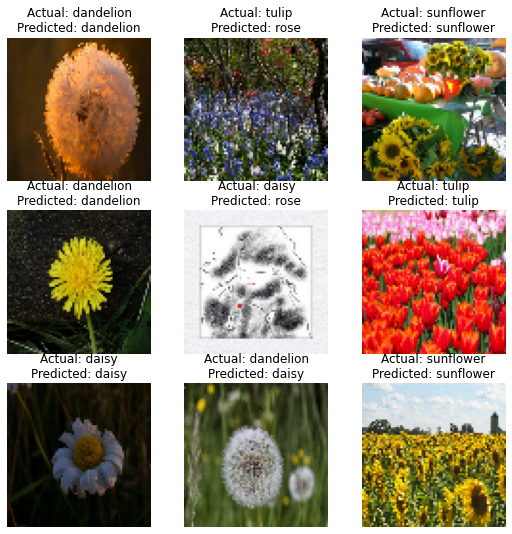

In [67]:
class_name = ["daisy","dandelion","rose","sunflower","tulip"]
test_data_reshaped = test_data.reshape((1730, 75, 75, 3))
pred_labels = pred_labels.round()
import random
plt.figure(figsize = (9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    random_index = random.choice(range(len(test_data_reshaped)))
    plt.imshow(test_data_reshaped[random_index])
    plt.title("Actual: " + class_name[test_labels[random_index]] +
              "\nPredicted: " + class_name[np.argmax(pred_labels[random_index])])
    plt.axis(False)

In [77]:
np.argmax(pred_labels[1728])

2

In [72]:
pred_labels.round()

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)